In [1]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)
options(repr.plot.width=14, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




In [2]:
arg01 <- "tenx" #library name: tenx, dropseq, mca
arg02 <- "filtered_feature_bc_matrix/" #10X directory, dropseq / mca count matrix
arg03 <- "4_injury" #project name
arg04 <- "4_injury.rds"  #output file name for saveRDS function

In [3]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

An object of class Seurat 
21177 features across 9469 samples within 1 assay 
Active assay: RNA (21177 features)


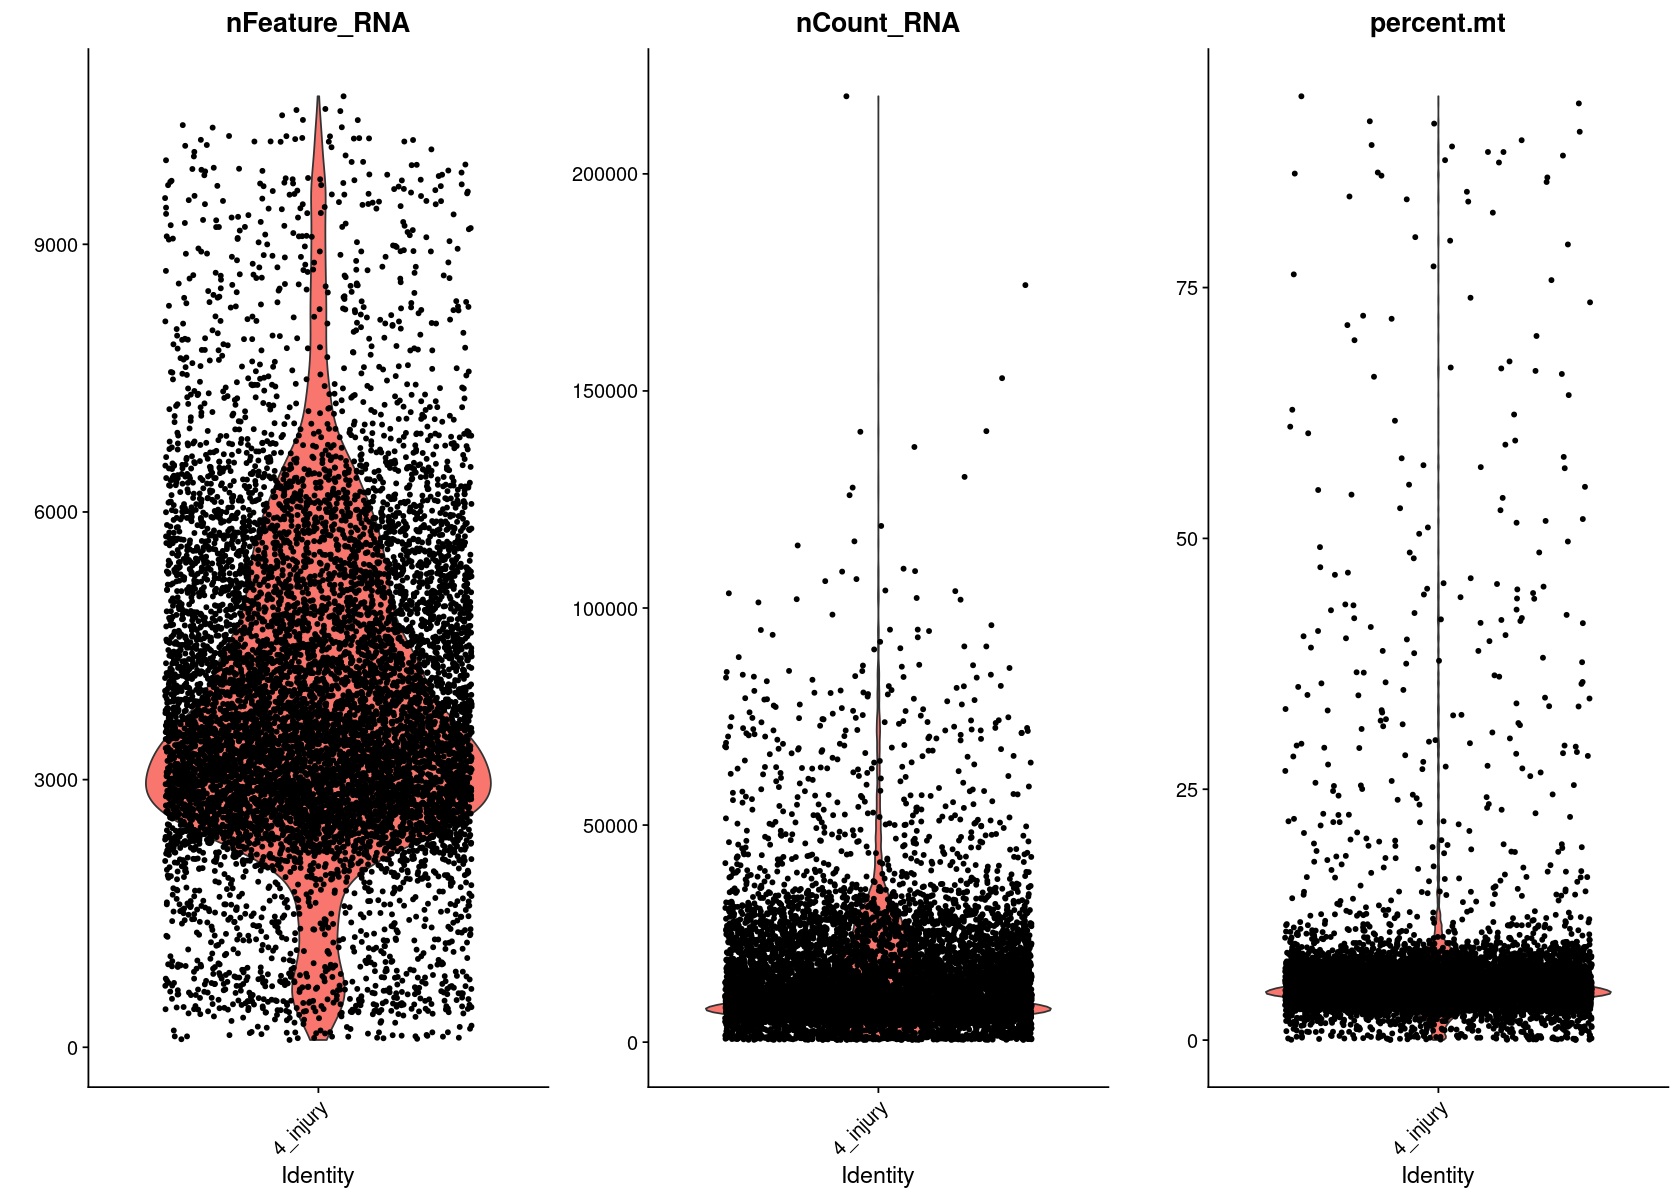

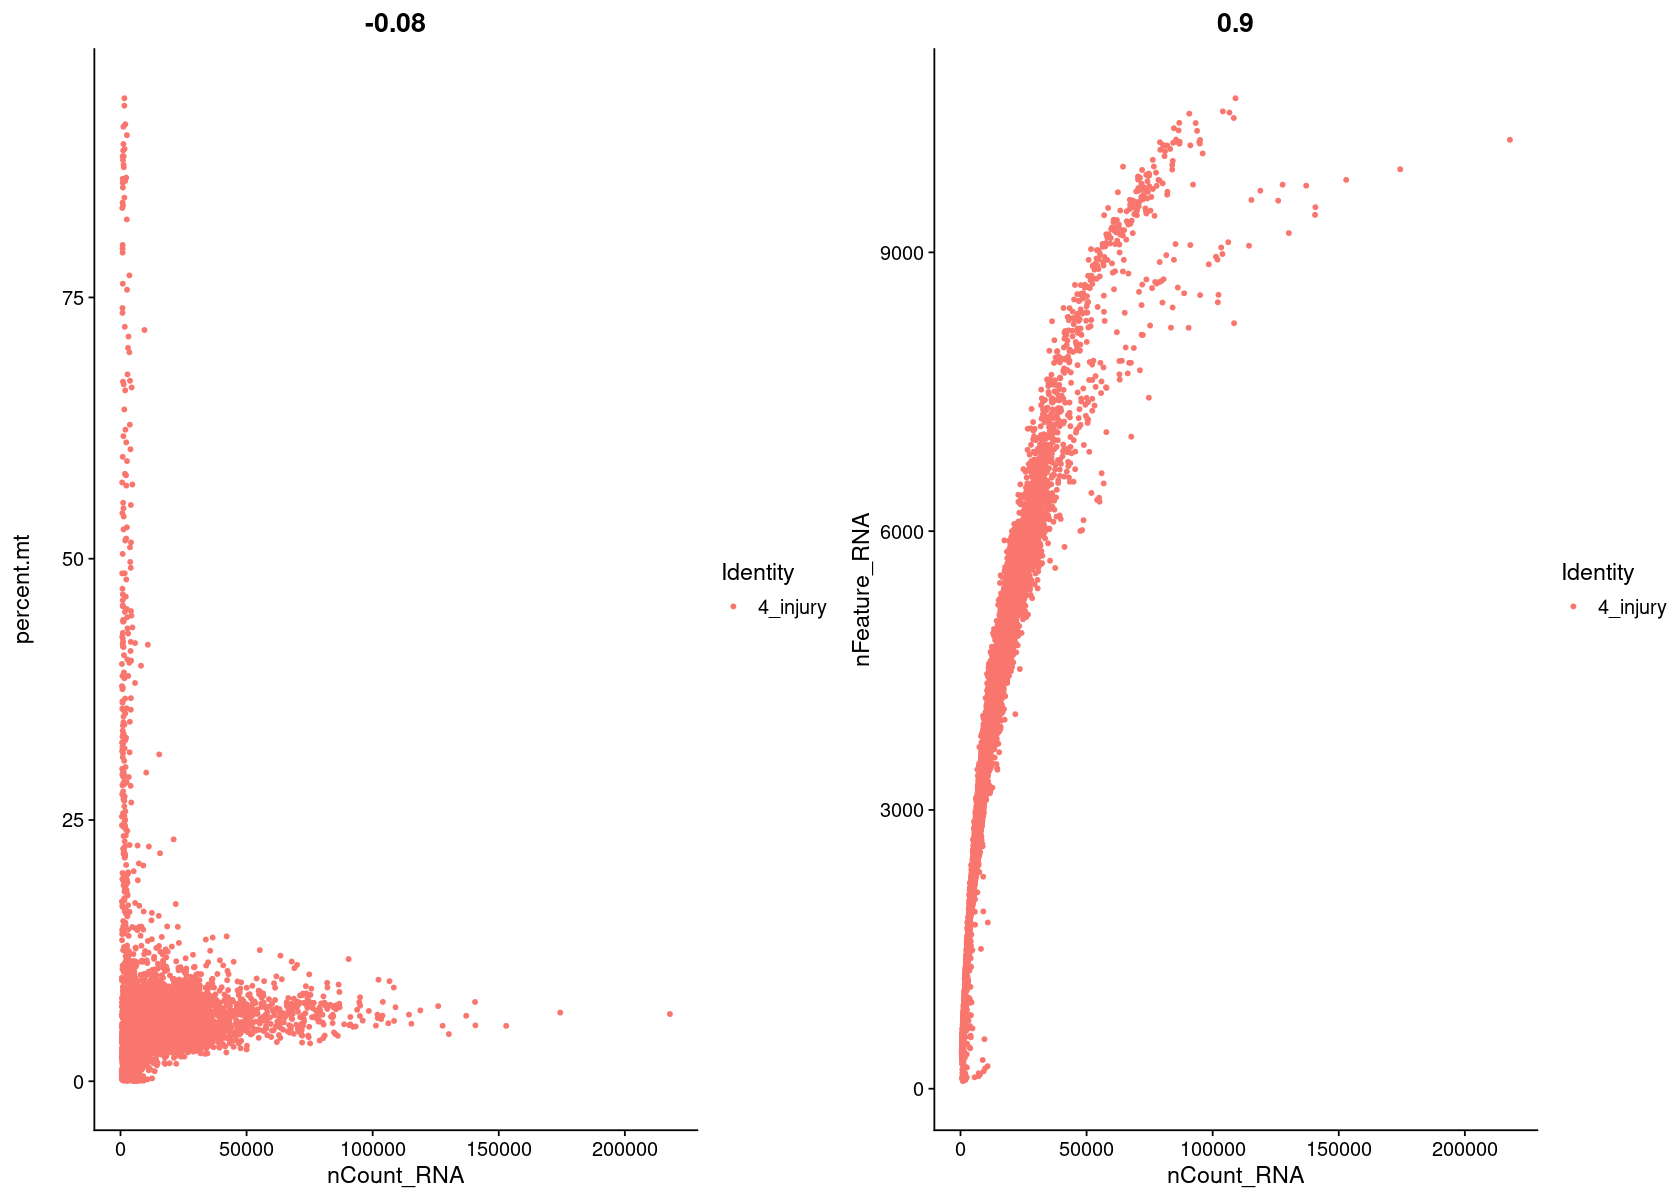

In [4]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^mt-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [5]:
arg05 <- 100 #nFeature_RNA_min
arg06 <- 10000 #nFeature_RNA_max
arg07 <- 10 #nCount_RNA_min
arg08 <- 100000 #nCount_RNA_max
arg09 <- 50 #percent.mt_max

An object of class Seurat 
21177 features across 9351 samples within 1 assay 
Active assay: RNA (21177 features)


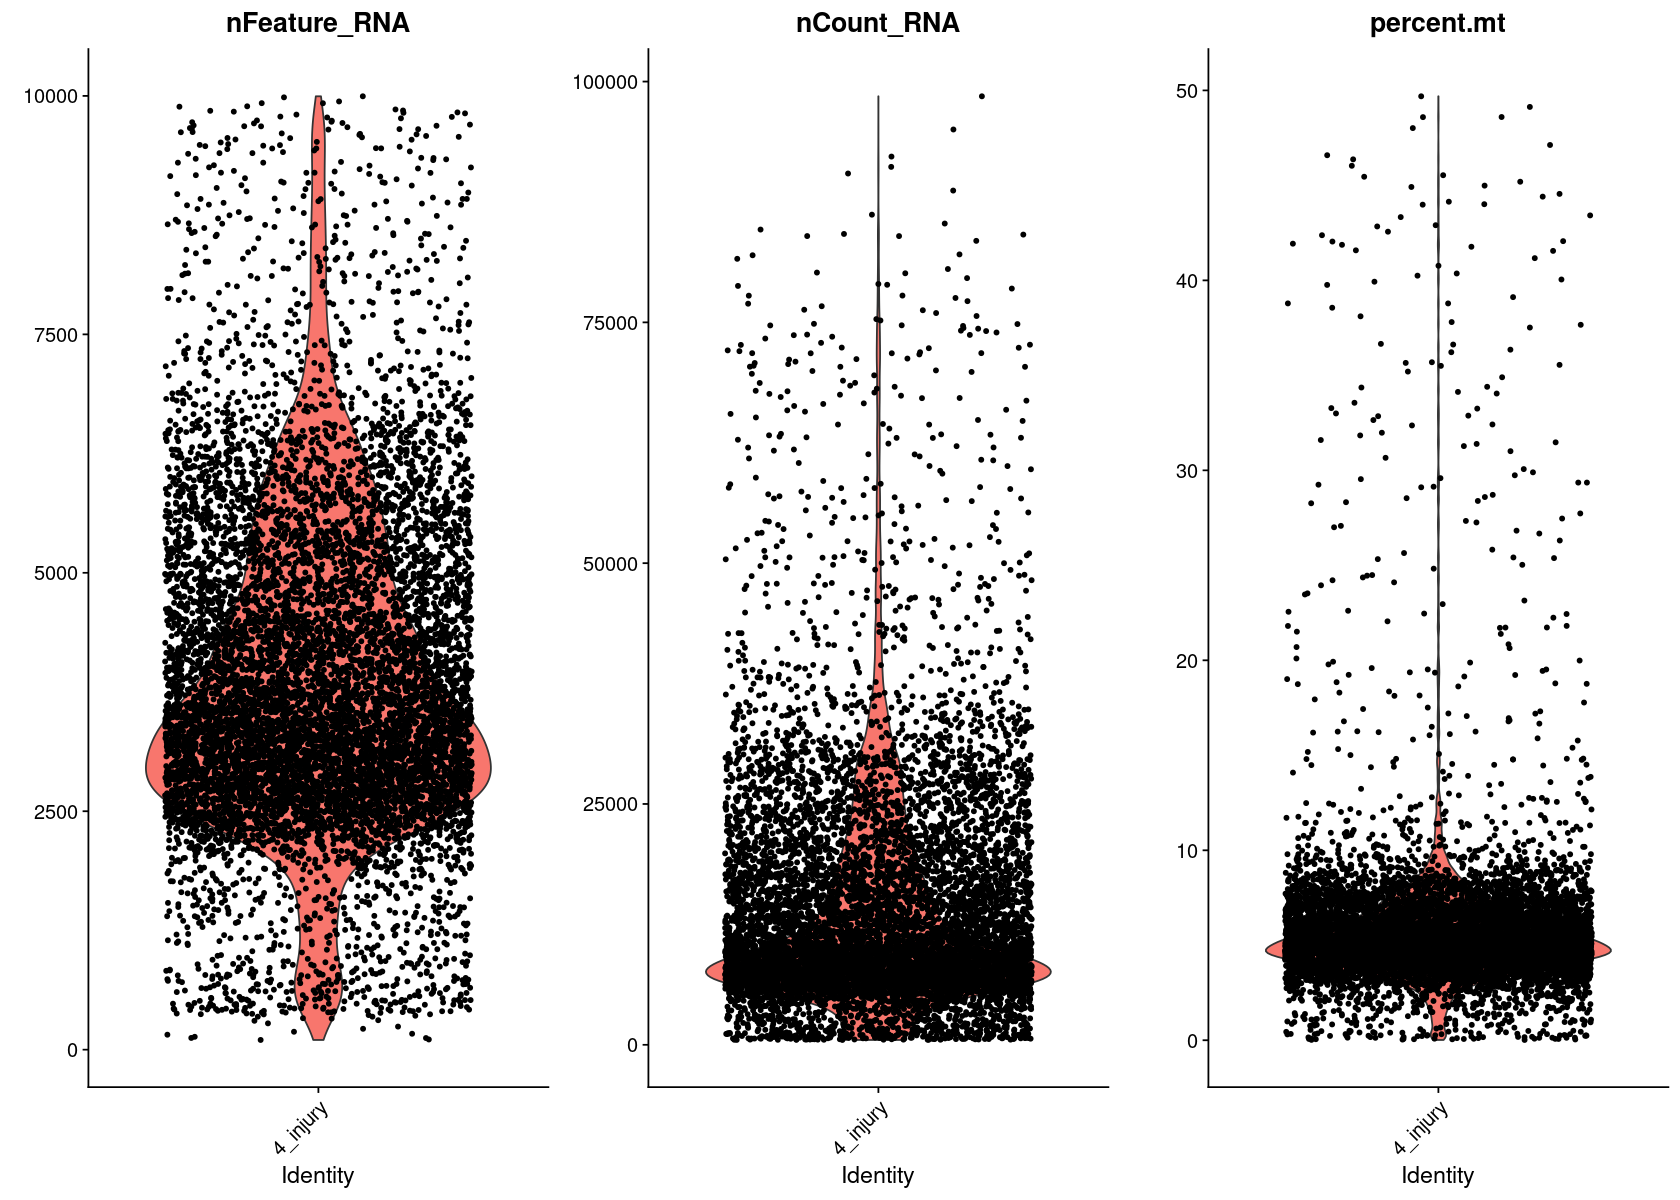

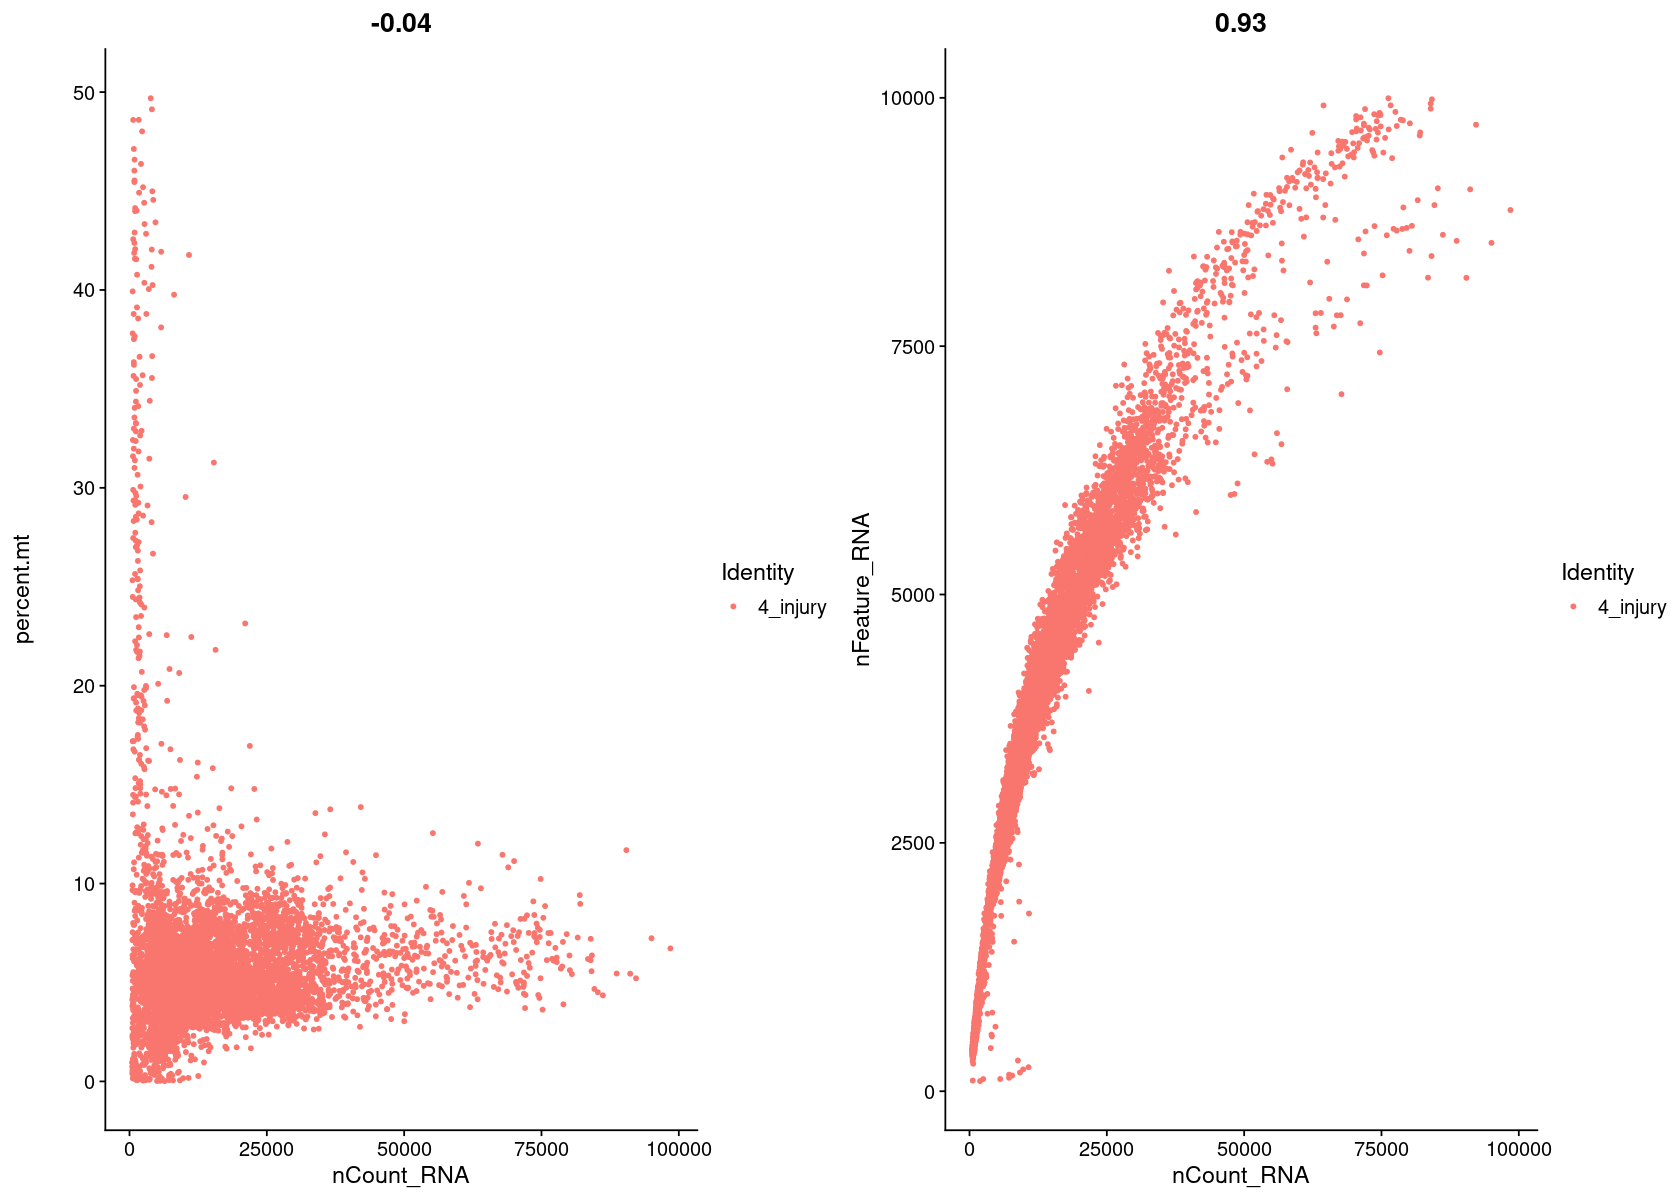

In [6]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results



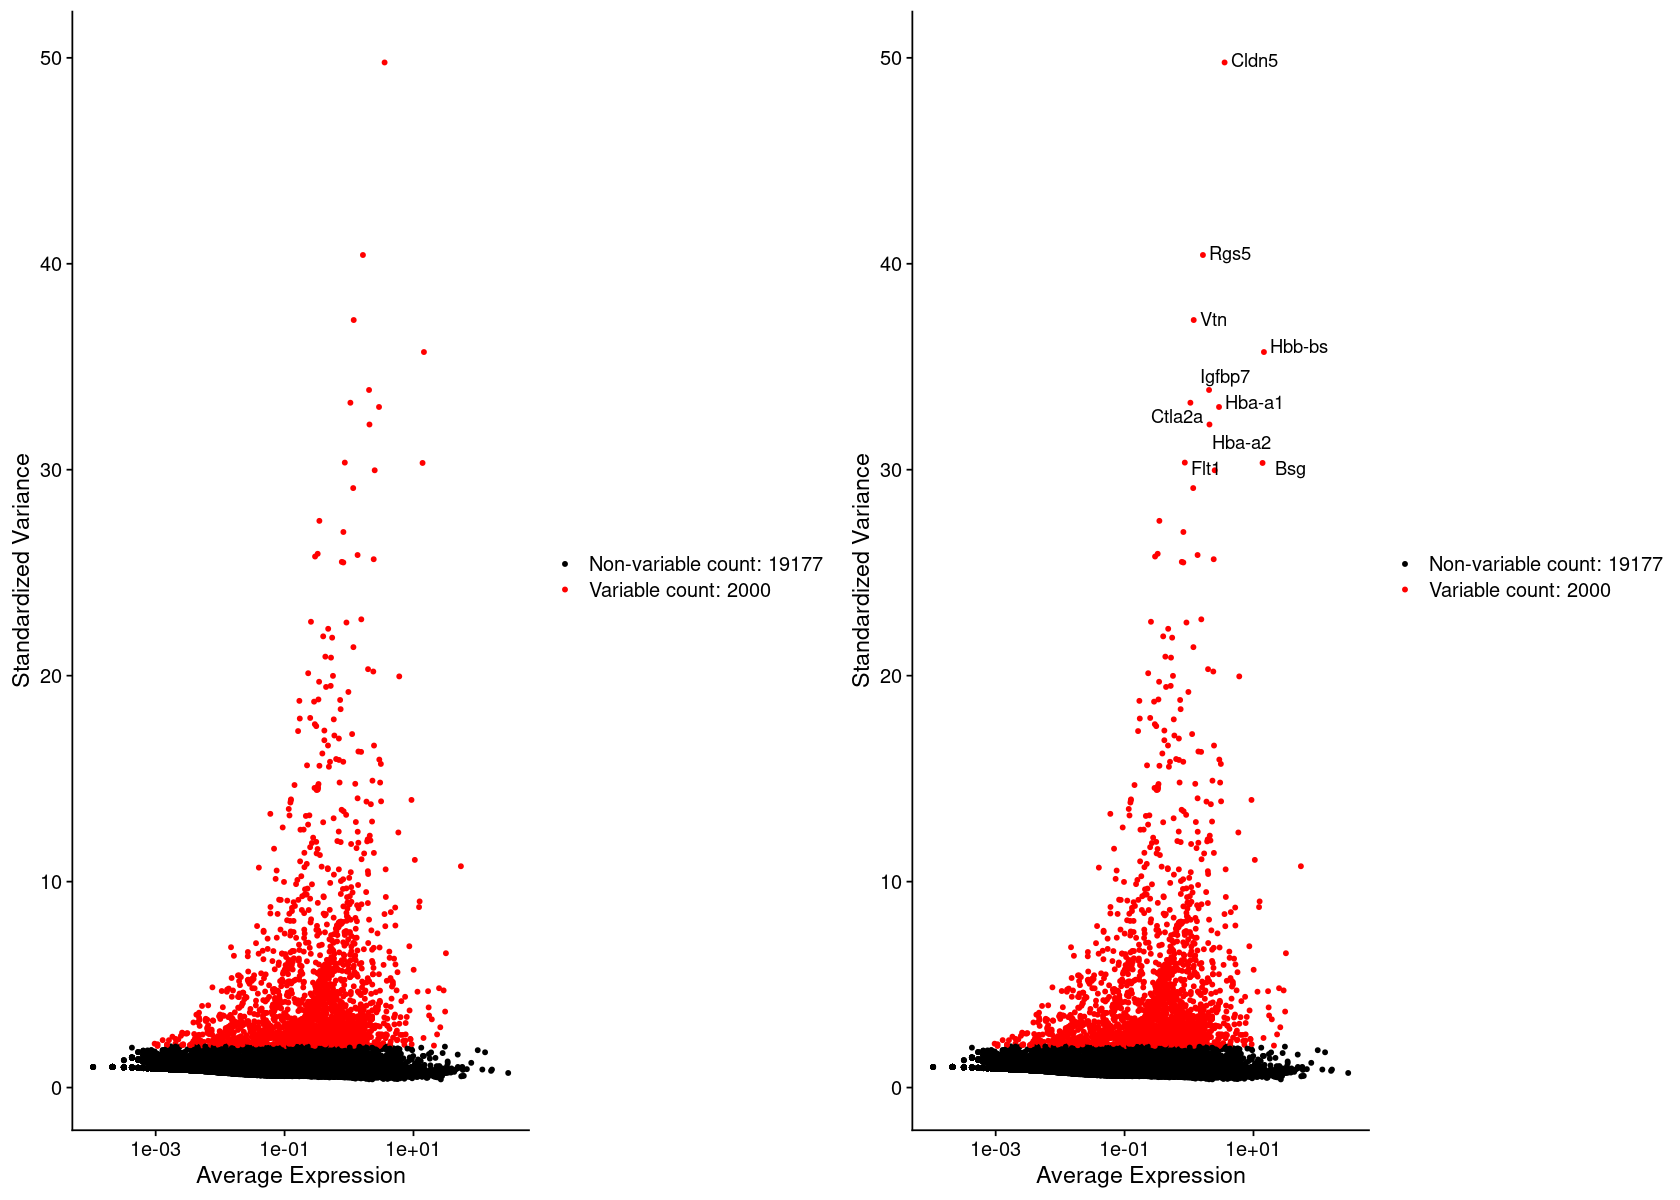

In [7]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)

plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))

Regressing out percent.mt

Centering and scaling data matrix

PC_ 1 
Positive:  Stmn3, Mllt11, Myt1l, Bcl11b, Mapt, Rab3a, Fyn, Aplp1, Snrpn, Olfm1 
	   Tubb4a, Gap43, Snap25, Lrp8, Pclaf, Plekha1, Hist1h2ap, Mki67, Hist1h2ae, Cdca3 
	   Spc24, Racgap1, Mafb, Birc5, Foxp2, Pbk, Ube2c, Cdca8, Nusap1, Fbxo5 
Negative:  Ak7, Rsph1, 1700016K19Rik, Dnah9, Dnah6, Ccdc153, Dynlrb2, Cfap54, Tppp3, Tm4sf1 
	   Meig1, Tmem212, Dnah12, Foxj1, Rsph4a, Spag17, 1700007K13Rik, 1700012B09Rik, Spef2, 1110017D15Rik 
	   Ccdc146, Cfap206, Gm867, Odf3b, Hdc, Iqca, Rarres2, Dnali1, Cfap126, 1700001C02Rik 
PC_ 2 
Positive:  Ezr, Hmgb2, Cnn3, Smc4, Vim, Smc2, Pclaf, Hist1h1e, Pbk, Top2a 
	   Jun, Mki67, Cdca8, Rrm2, Birc5, Cenpf, Cdca3, Tpx2, Ccdc34, Knl1 
	   Kif11, Ccna2, Ube2c, Spc24, Cks2, Prc1, Slc1a3, Hist1h1b, Cdk1, Cenpa 
Negative:  Caln1, Gpr88, Grm5, Snca, Tmem158, Eef1a2, Snhg11, Camk2b, Ppp1r1b, Camkv 
	   Rasgef1a, Pcp4, Rxrg, Nrgn, Ppp2r2c, Caly, Lypd1, Syndig1l, Fxyd7, Gda 
	   Arpp21, Gnal, A

PC_ 1 
Positive:  Stmn3, Mllt11, Myt1l, Bcl11b, Mapt 
Negative:  Ak7, Rsph1, 1700016K19Rik, Dnah9, Dnah6 
PC_ 2 
Positive:  Ezr, Hmgb2, Cnn3, Smc4, Vim 
Negative:  Caln1, Gpr88, Grm5, Snca, Tmem158 
PC_ 3 
Positive:  Flt1, Eng, Foxq1, Esam, Cldn5 
Negative:  Nnat, Hsp90aa1, Stmn3, Ly6h, Plppr4 
PC_ 4 
Positive:  Calm2, Nudt4, Csrp2, Nnat, Hsp90aa1 
Negative:  Cspg5, Cldn10, Plpp3, Aldoc, Slc1a2 
PC_ 5 
Positive:  Top2a, Mki67, Prc1, Ccna2, Birc5 
Negative:  Nnat, Meg3, Mllt11, Myt1l, Cald1 


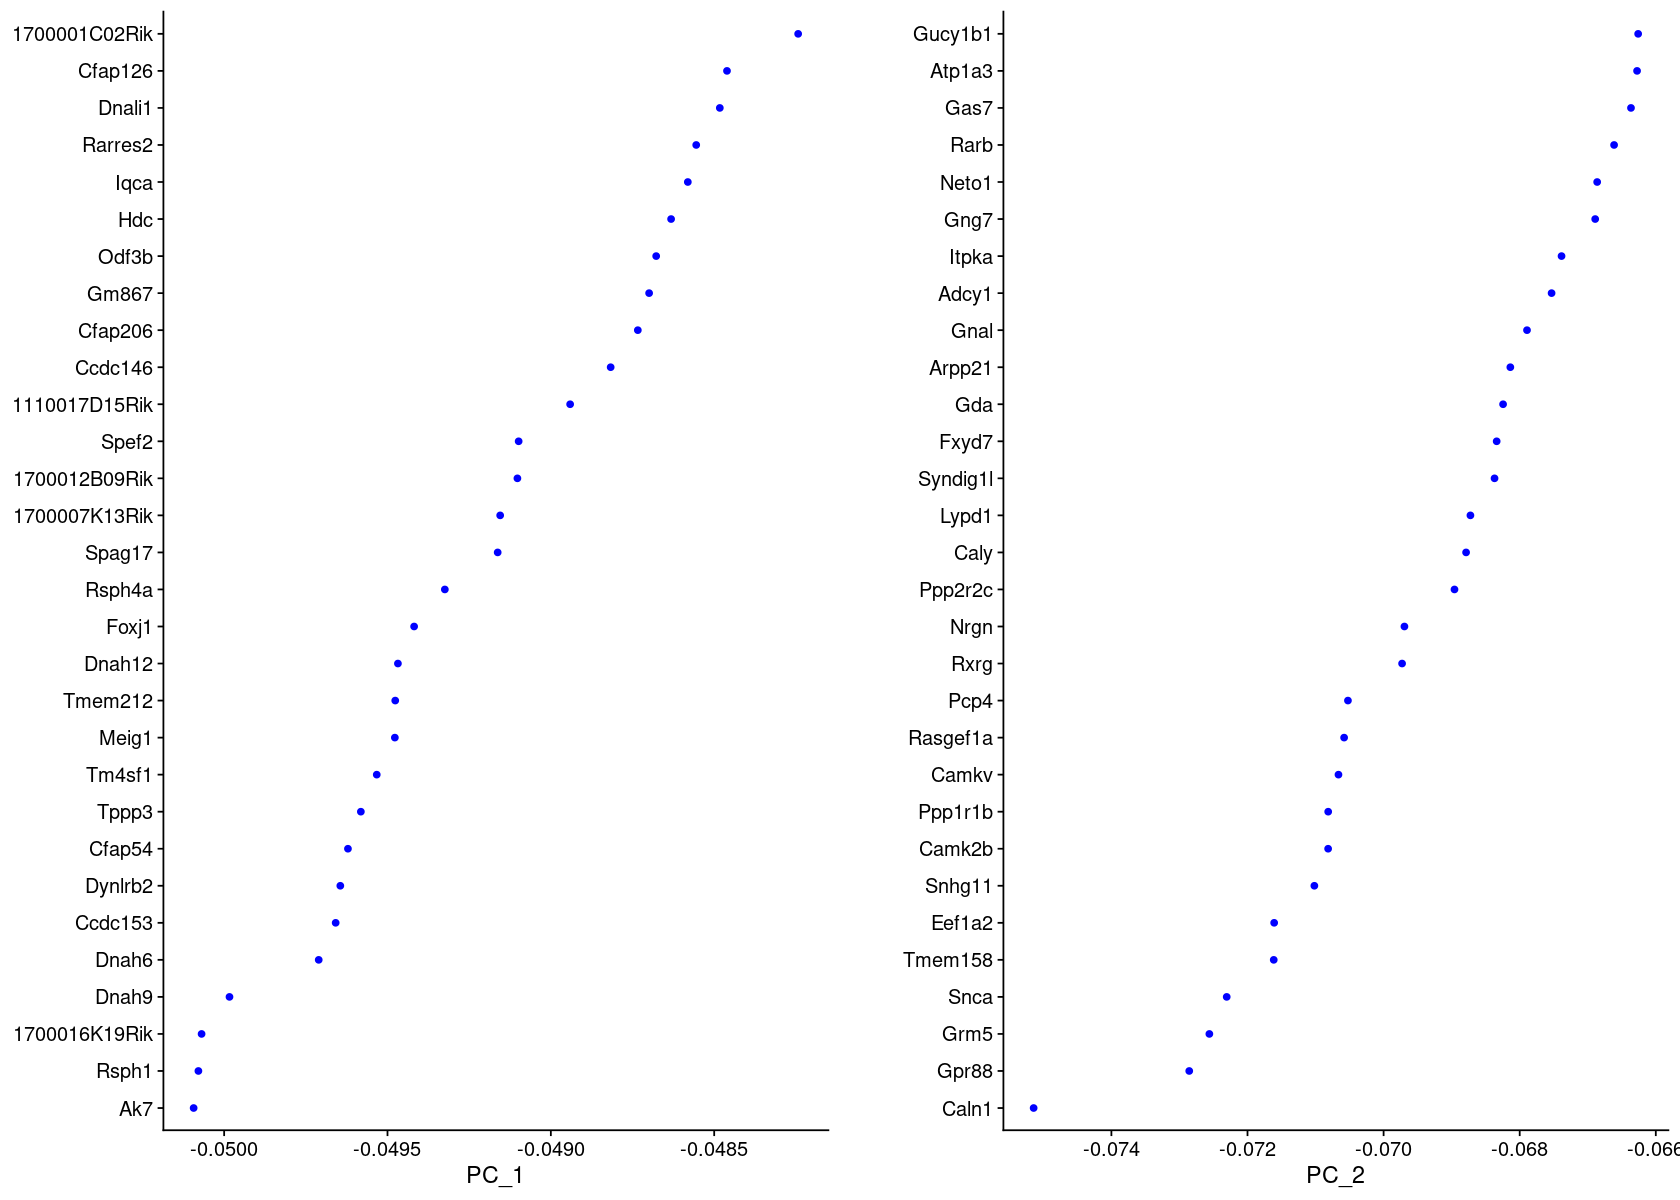

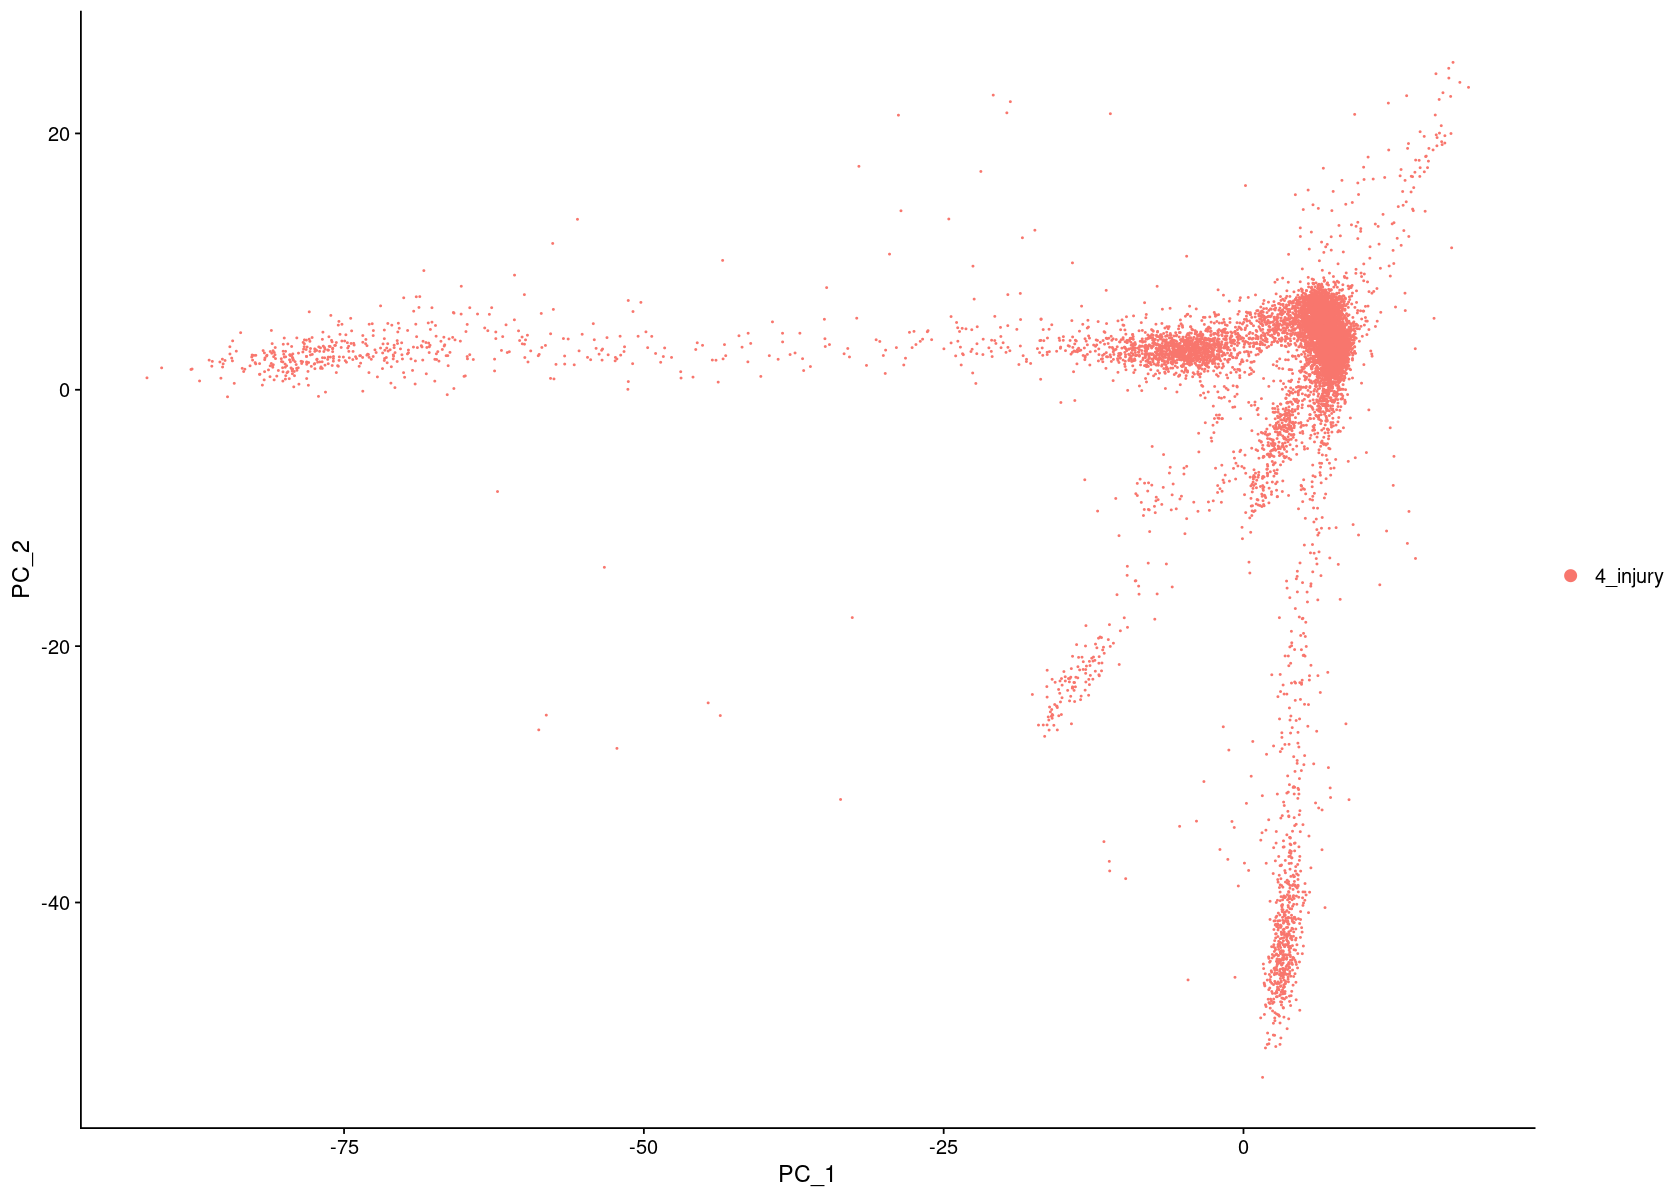

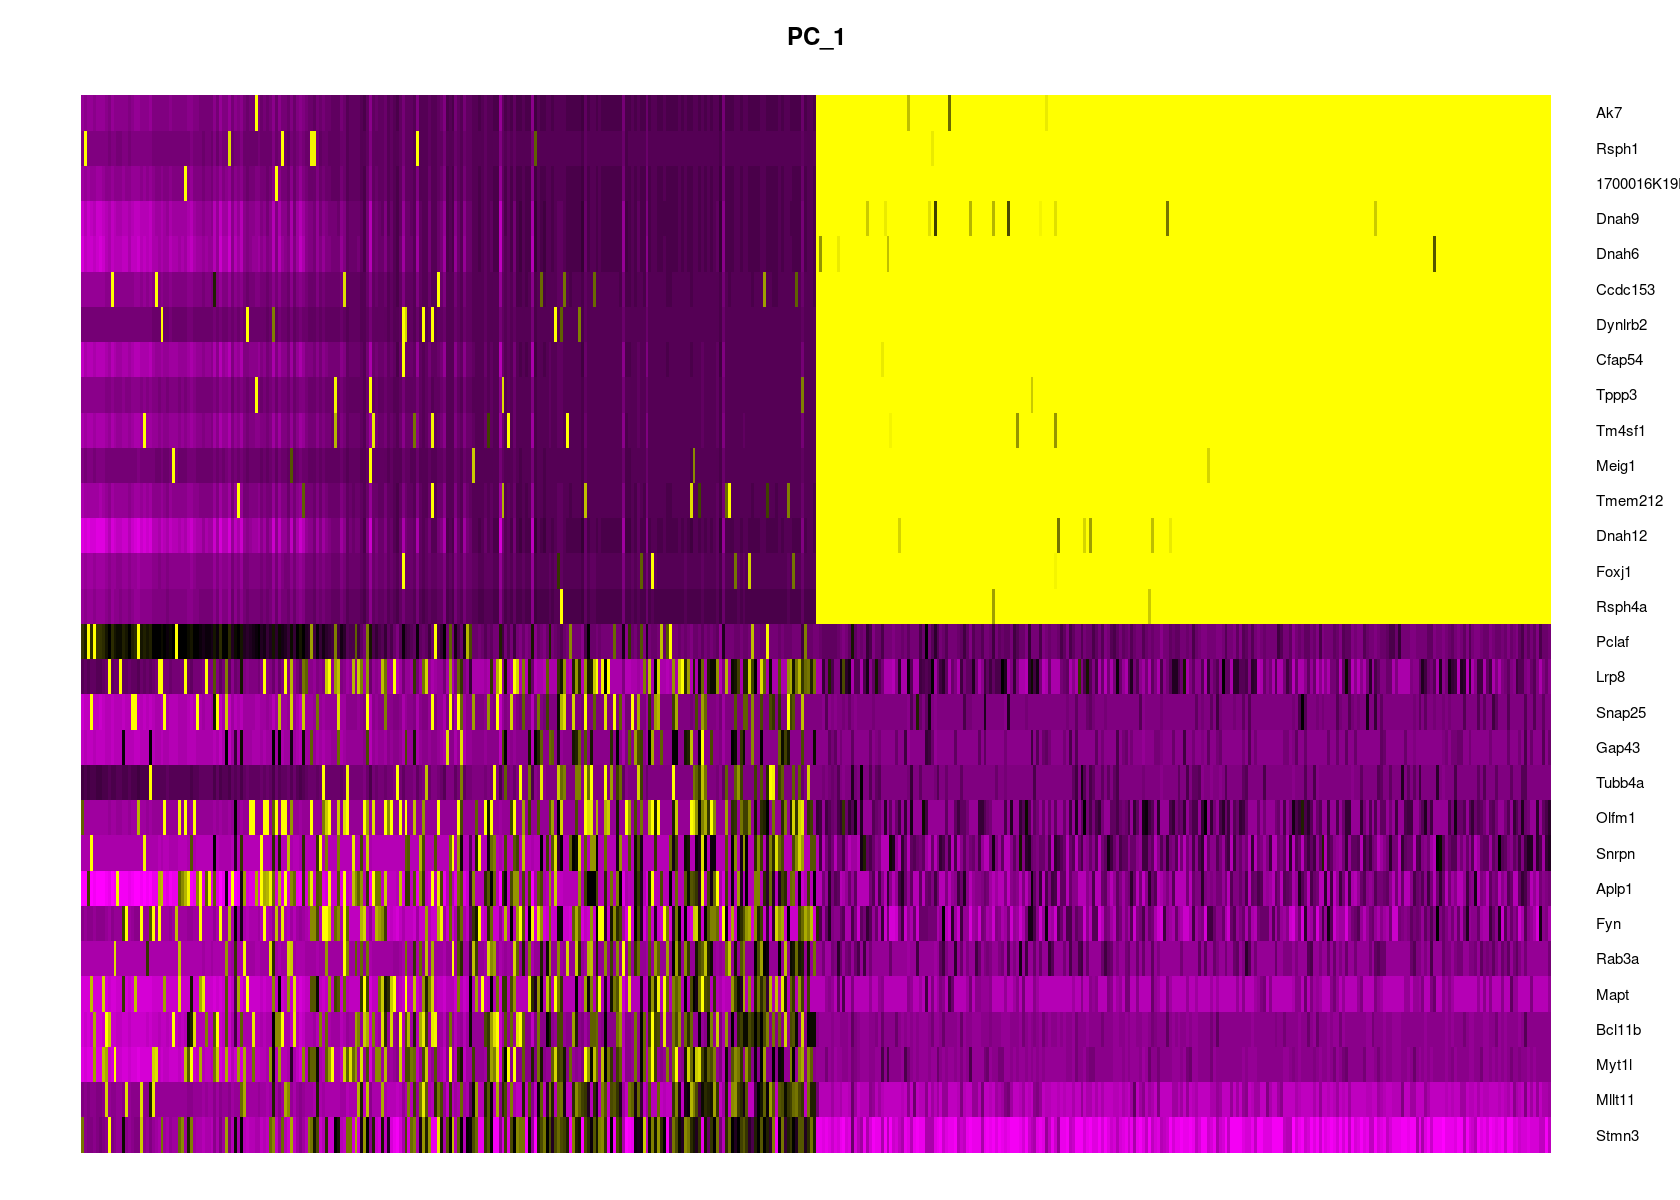

In [8]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, vars.to.regress='percent.mt')
#tmp <- ScaleData(tmp, features=all.genes)

tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")

DimPlot(tmp, reduction="pca")

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)

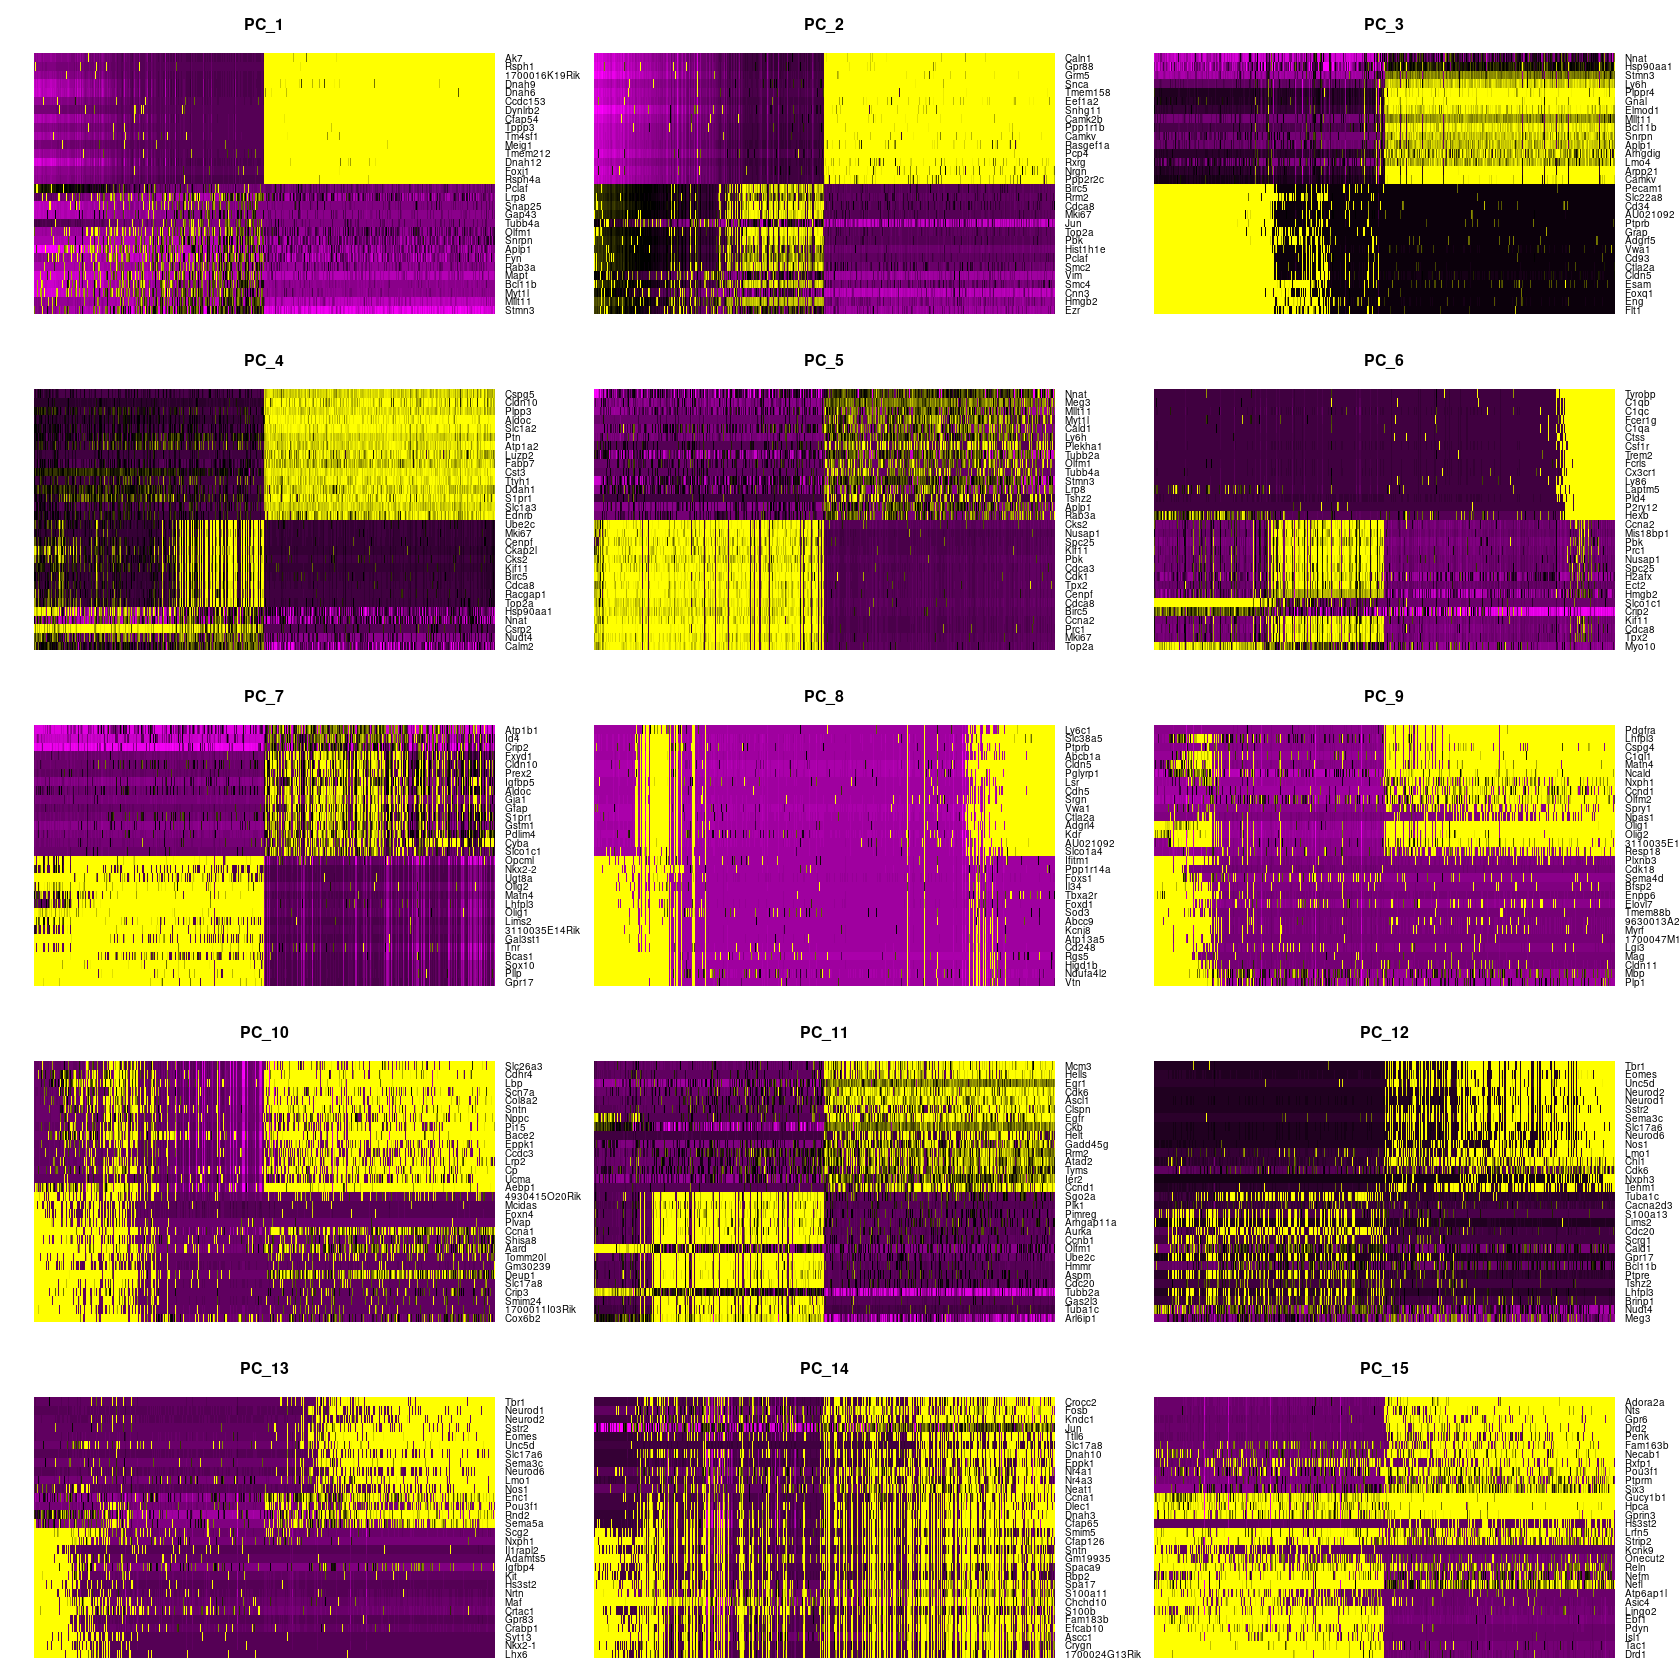

In [9]:
options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)

Warning message:
“Removed 28137 rows containing missing values (geom_point).”


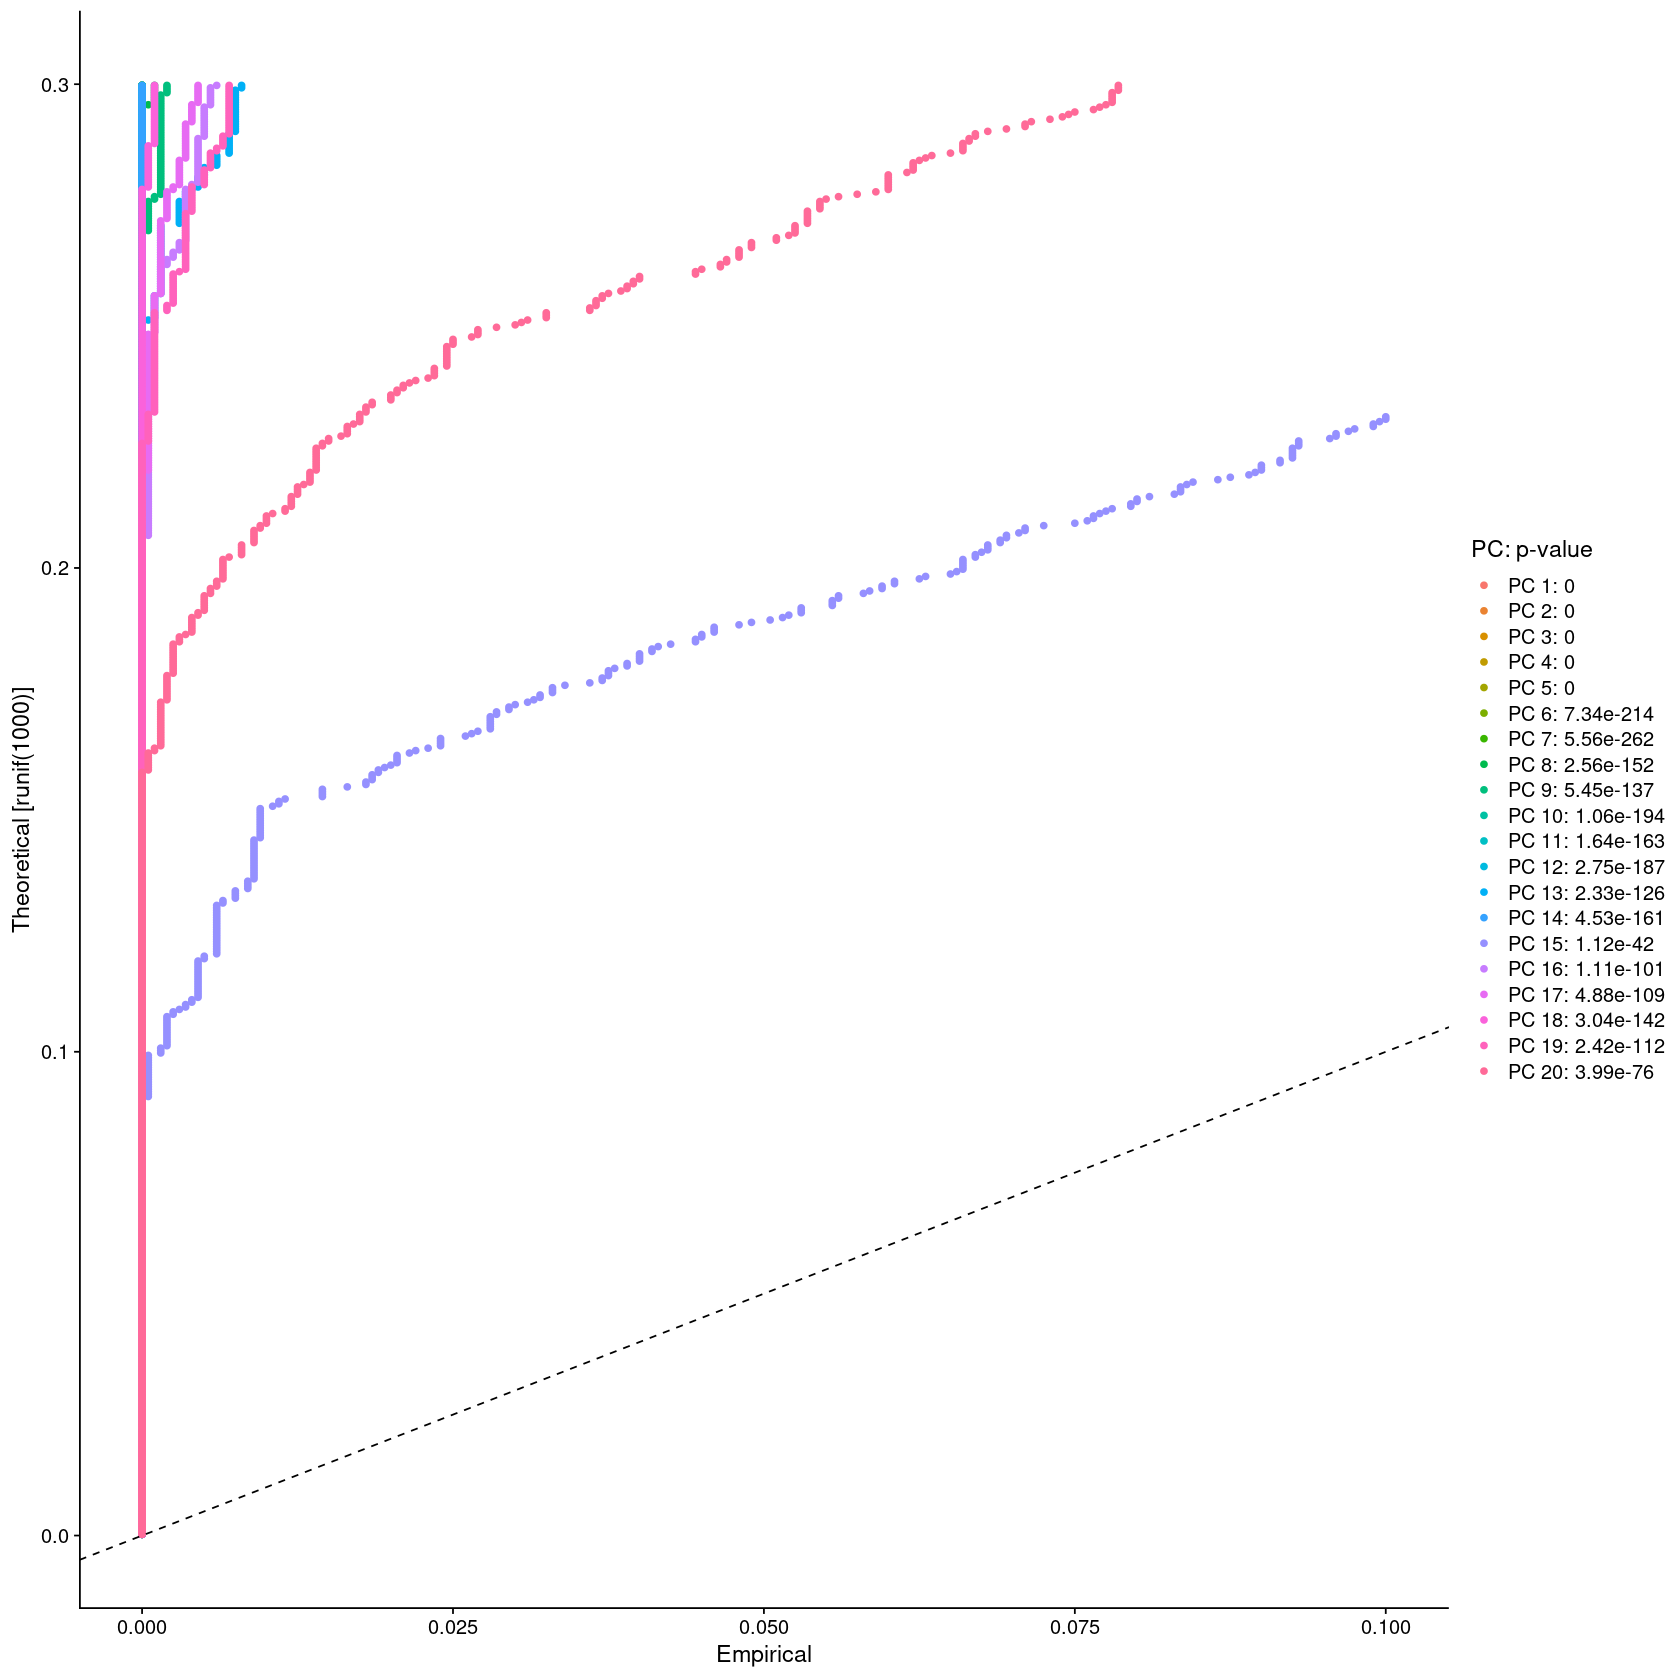

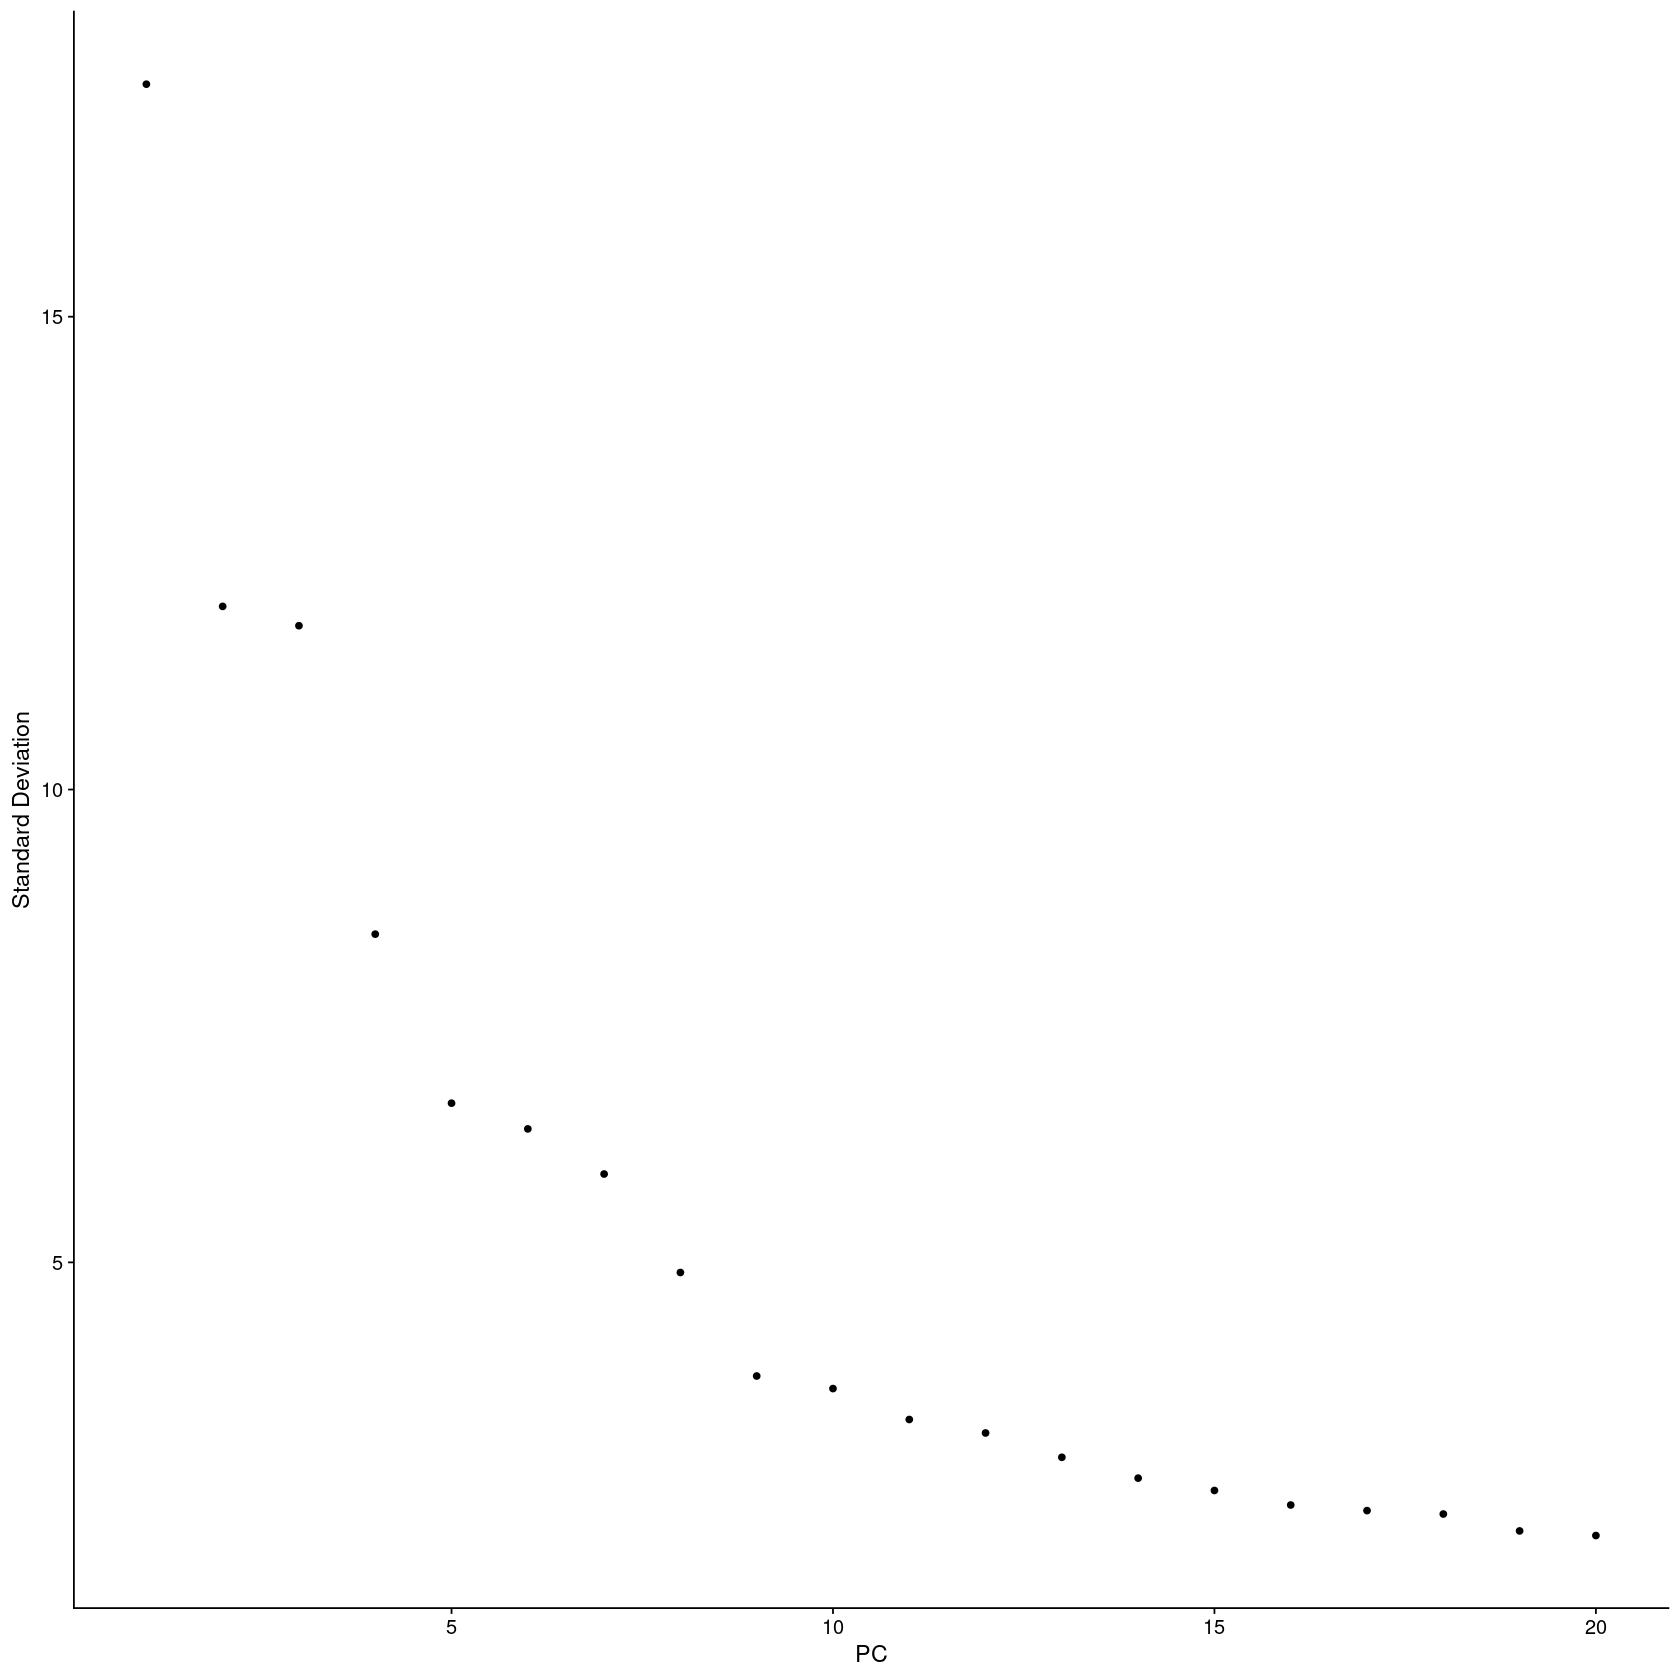

In [10]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)

ElbowPlot(tmp)

In [11]:
arg10 <- 20 #maximum PC

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9351
Number of edges: 325503

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 23
Elapsed time: 11 seconds


AAACCCACAAATCAGA AAACCCACAGACGGAT AAACCCAGTTAGTTCG AAACCCATCCTGGCTT 
               1                0                5                1 
AAACCCATCGCCTAGG 
               1 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22

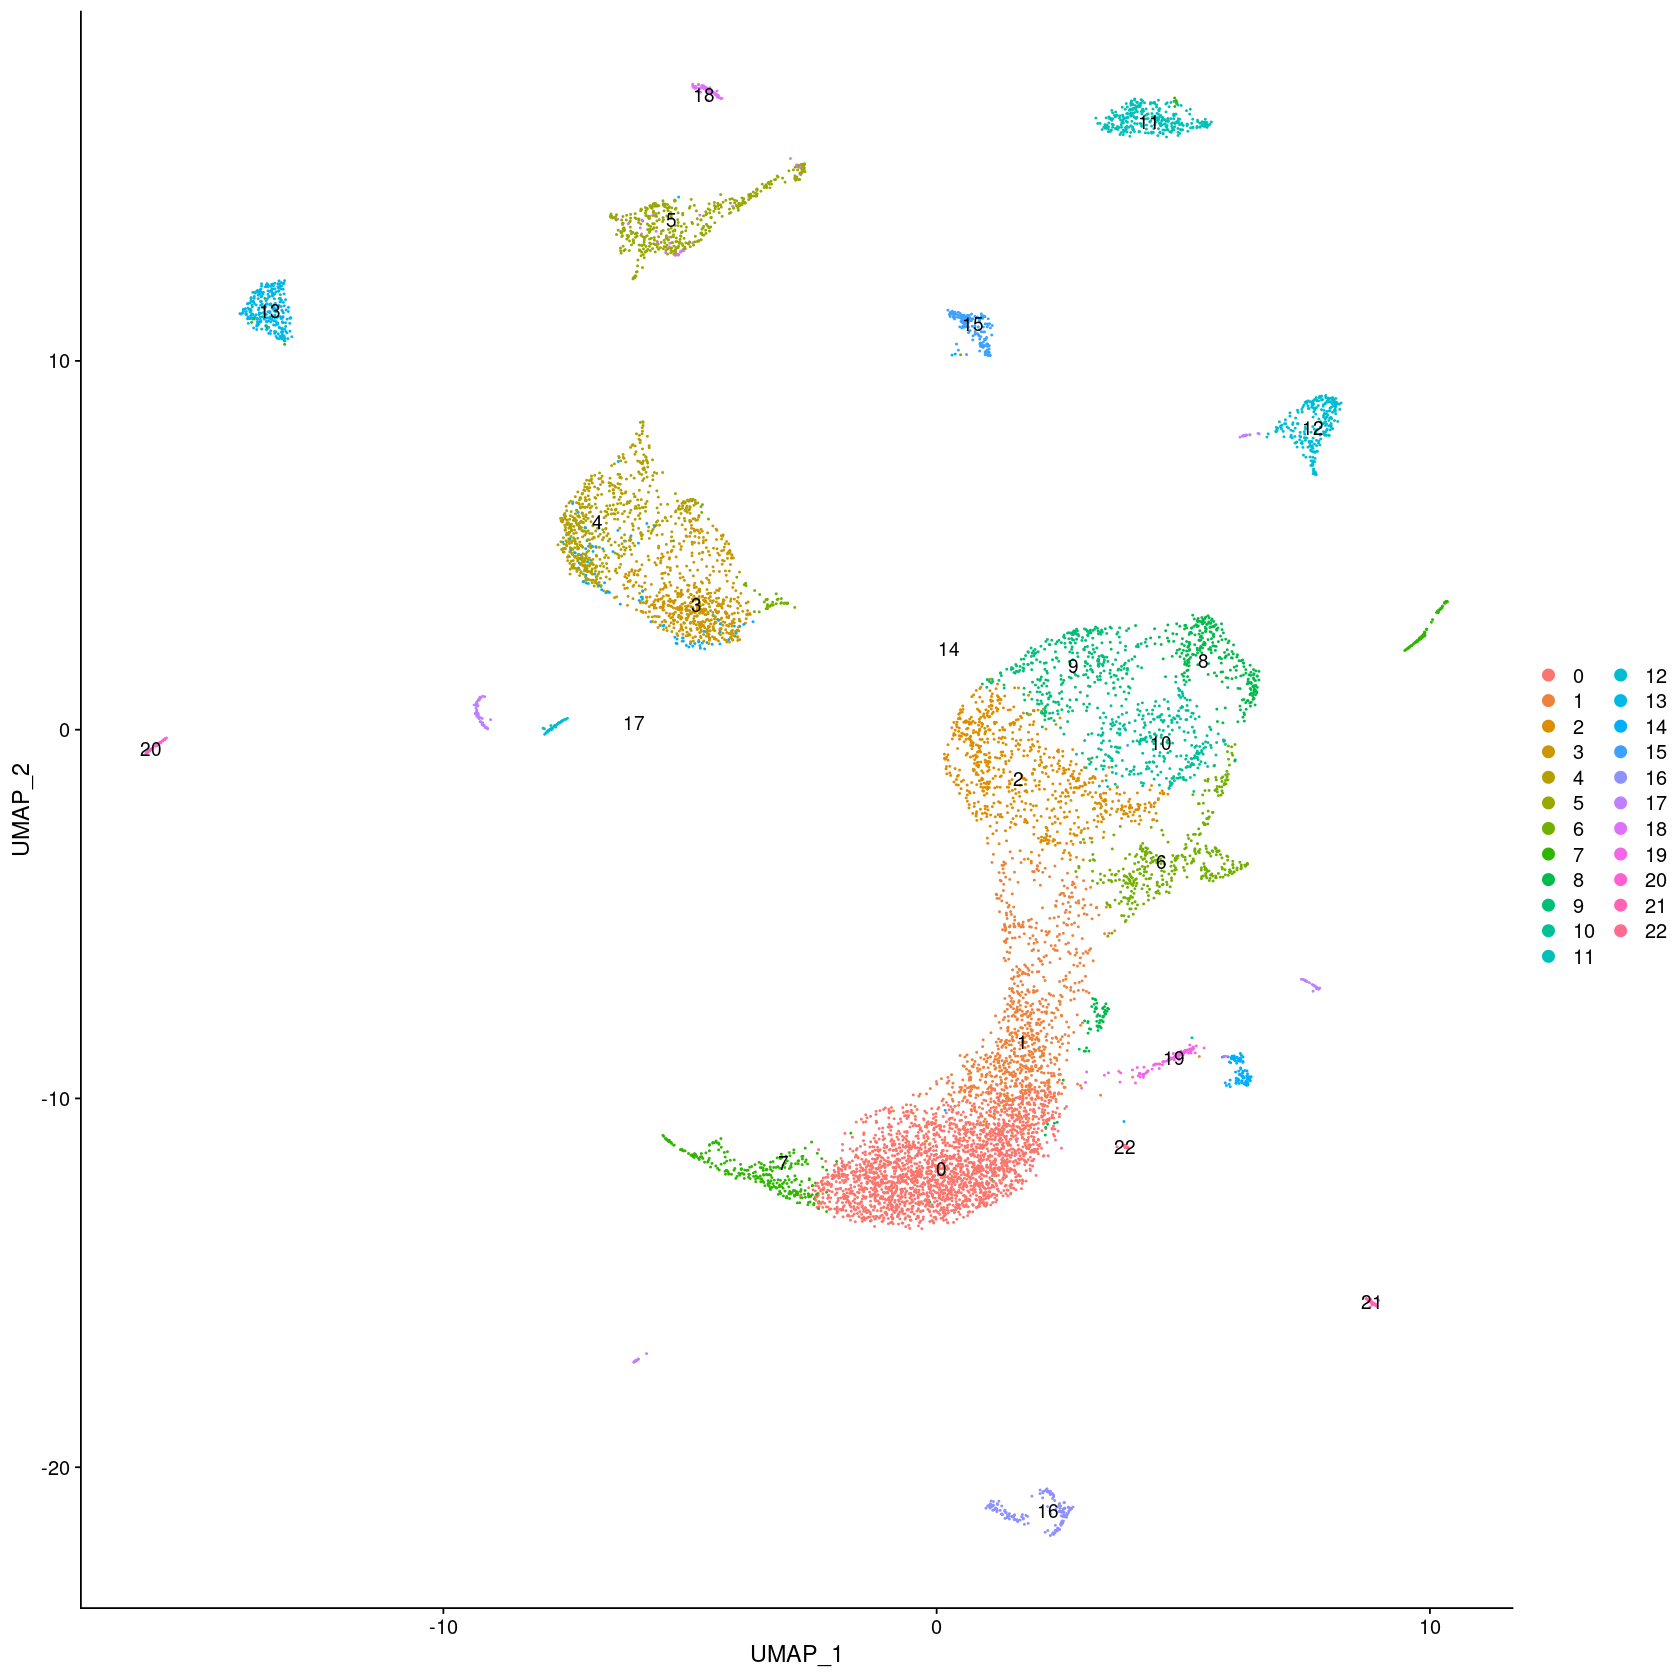

In [12]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10, umap.method='umap-learn', metric='correlation')
DimPlot(tmp, reduction="umap", label=TRUE)

In [13]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.3411247,0.983,0.727,0.000000e+00,0,Zfp704
0.000000e+00,1.3186039,0.995,0.898,0.000000e+00,0,Btg1
0.000000e+00,1.1578407,0.996,0.858,0.000000e+00,1,Ccnd2
7.423012e-216,0.8370809,0.976,0.716,1.571971e-211,1,Abracl
0.000000e+00,2.1982993,0.993,0.274,0.000000e+00,2,Hist1h2ap
0.000000e+00,2.1580262,0.990,0.206,0.000000e+00,2,Hist1h1b
0.000000e+00,2.0262134,1.000,0.933,0.000000e+00,3,Cst3
0.000000e+00,1.9734354,0.943,0.147,0.000000e+00,3,Gfap
0.000000e+00,2.3215444,0.998,0.445,0.000000e+00,4,Slc1a2


In [14]:
write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

In [15]:
saveRDS(tmp, file=arg04)

In [16]:
#sample <- readRDS(file=args04)

In [17]:
#From CellMarker
#cancer_marker <- list('CD44', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#   p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}

In [18]:
#From Dr.Nagasawa slide
#cancer_marker <- list('VIM', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#    p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}